In [109]:
## Air Quality Index Prediction Model

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [110]:
df = pd.read_csv("air quality data.csv")

In [111]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [112]:
# didmensions of the dataset
df.shape

(29531, 16)

In [113]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [115]:
df.isnull()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29527,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29528,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [116]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [117]:
## drop the all rows where AQI column is null as they don't have any importance
df.dropna(subset = ['AQI'],inplace = True)

In [118]:
df.shape

(24850, 16)

In [119]:
df.isnull().sum().sort_values(ascending = False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [120]:
(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
Date           0.000000
City           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

In [121]:
cor = df.select_dtypes("float64").corr()
cor

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.853200,0.459610,0.366404,0.451946,0.282001,0.093524,0.136998,0.167262,0.020743,0.119306,0.114885,0.659181
PM10,0.853200,1.000000,0.530343,0.483121,0.544327,0.392048,0.116719,0.260924,0.251704,0.018284,0.168939,0.081902,0.803313
NO,0.459610,0.530343,1.000000,0.488197,0.801345,0.184721,0.217054,0.189123,0.017864,0.041796,0.153376,0.099510,0.452191
NO2,0.366404,0.483121,0.488197,1.000000,0.633837,0.236165,0.371186,0.425414,0.295962,0.027901,0.274811,0.168651,0.537071
NOx,0.451946,0.544327,0.801345,0.633837,1.000000,0.161563,0.248999,0.259134,0.096364,0.046627,0.202927,0.101831,0.486450
NH3,0.282001,0.392048,0.184721,0.236165,0.161563,1.000000,0.114204,-0.028089,0.095282,-0.015771,0.010554,-0.020415,0.252019
CO,0.093524,0.116719,0.217054,0.371186,0.248999,0.114204,1.000000,0.511013,0.041634,0.047629,0.273694,0.138100,0.683346
SO2,0.136998,0.260924,0.189123,0.425414,0.259134,-0.028089,0.511013,1.000000,0.171489,0.039395,0.313578,0.254051,0.490586
O3,0.167262,0.251704,0.017864,0.295962,0.096364,0.095282,0.041634,0.171489,1.000000,0.018140,0.128536,0.106808,0.198991
Benzene,0.020743,0.018284,0.041796,0.027901,0.046627,-0.015771,0.047629,0.039395,0.018140,1.000000,0.764280,0.381885,0.044407


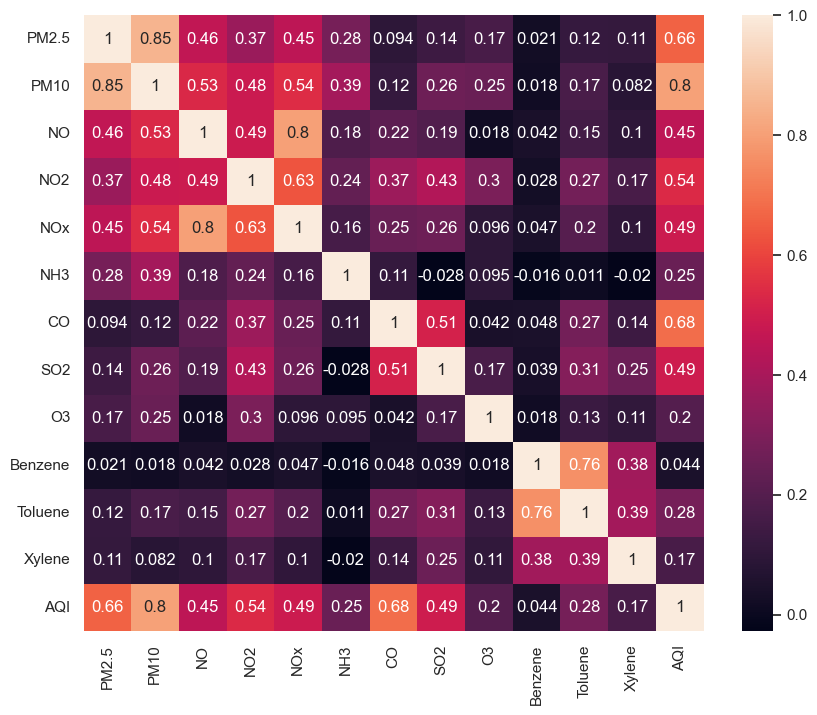

In [122]:
plt.figure(figsize = (10,8))
sns.heatmap(cor,annot = True)
plt.show()

In [123]:
df[['Xylene','AQI']].corr()

,Xylene,AQI
Xylene,1.000000,0.165532
AQI,0.165532,1.000000


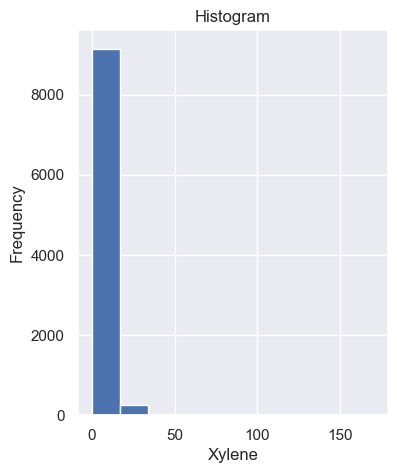

In [124]:
## univariate analysis
plt.figure(figsize=(4,5))
plt.title("Histogram")
plt.xlabel("Xylene")
plt.ylabel("Frequency")
plt.hist(df['Xylene'])
plt.show()

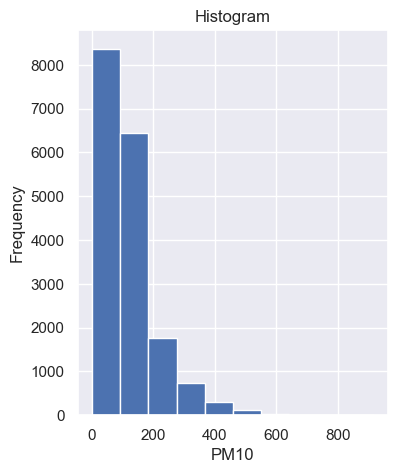

In [125]:
plt.figure(figsize=(4,5))
plt.title("Histogram")
plt.xlabel("PM10")
plt.ylabel("Frequency")
plt.hist(df['PM10'])
plt.show()

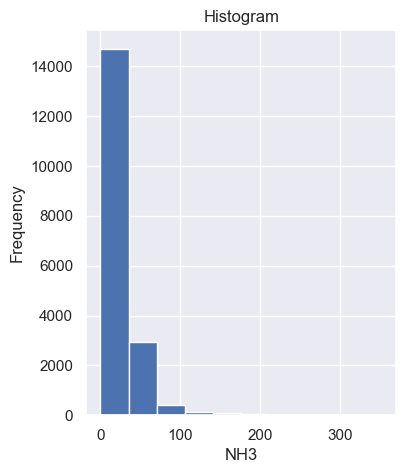

In [126]:
plt.figure(figsize=(4,5))
plt.title("Histogram")
plt.xlabel("NH3")
plt.ylabel("Frequency")
plt.hist(df['NH3'])
plt.show()

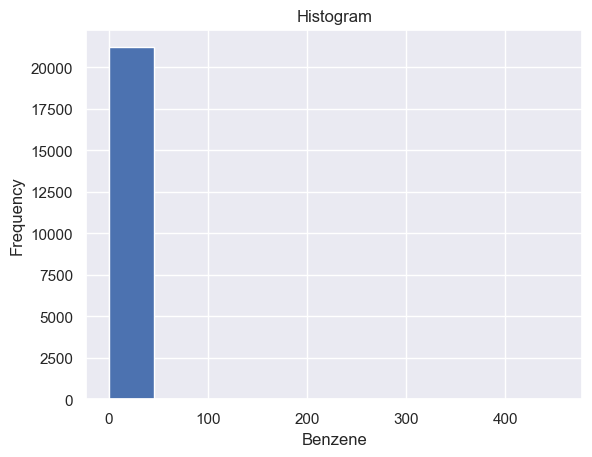

In [127]:

plt.title("Histogram")
plt.xlabel("Benzene")
plt.ylabel("Frequency")
plt.hist(df['Benzene'])
plt.show()

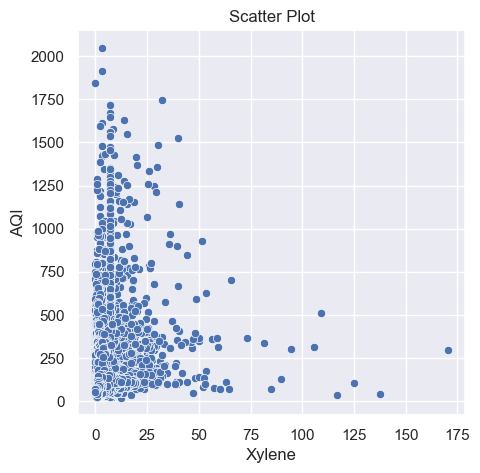

In [128]:
plt.figure(figsize=(5,5))
plt.title("Scatter Plot")
plt.xlabel("Xylene")
plt.ylabel("AQI")
sns.scatterplot(x="Xylene",y='AQI',data=df)
plt.show()

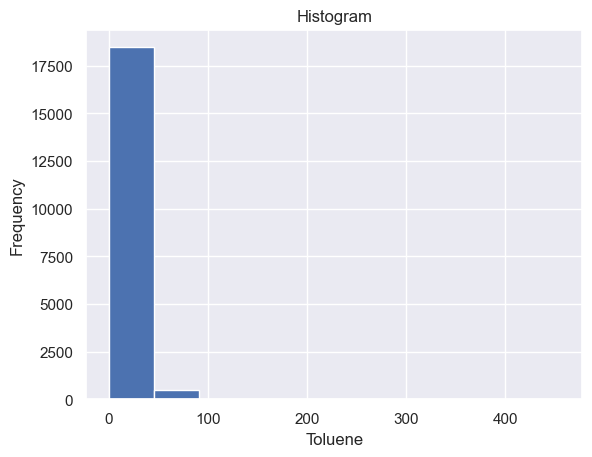

In [129]:

plt.title("Histogram")
plt.xlabel("Toluene")
plt.ylabel("Frequency")
plt.hist(df['Toluene'])
plt.show()

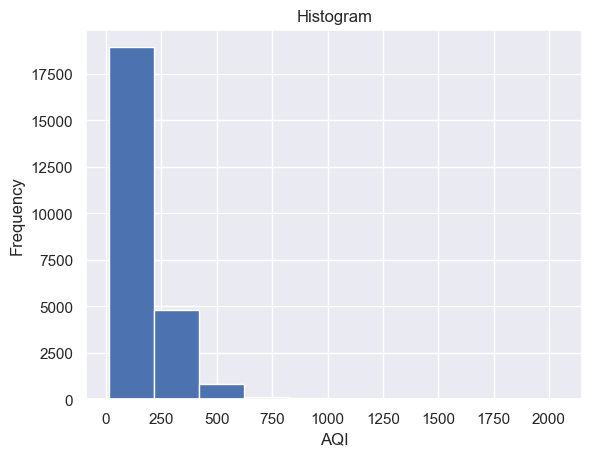

In [130]:

plt.title("Histogram")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.hist(df['AQI'])
plt.show()

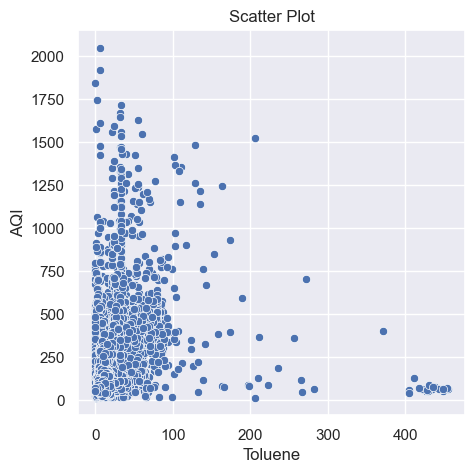

In [131]:
plt.figure(figsize=(5,5))
plt.title("Scatter Plot")
plt.xlabel("Toluene")
plt.ylabel("AQI")
sns.scatterplot(x="Toluene",y='AQI',data=df)
plt.show()

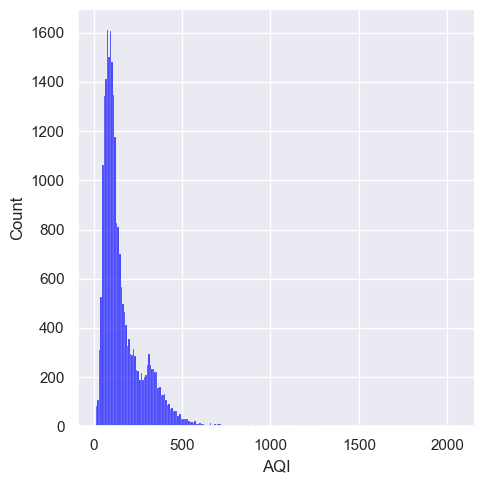

In [132]:
sns.displot(data=df,x='AQI',color="blue")
plt.show()

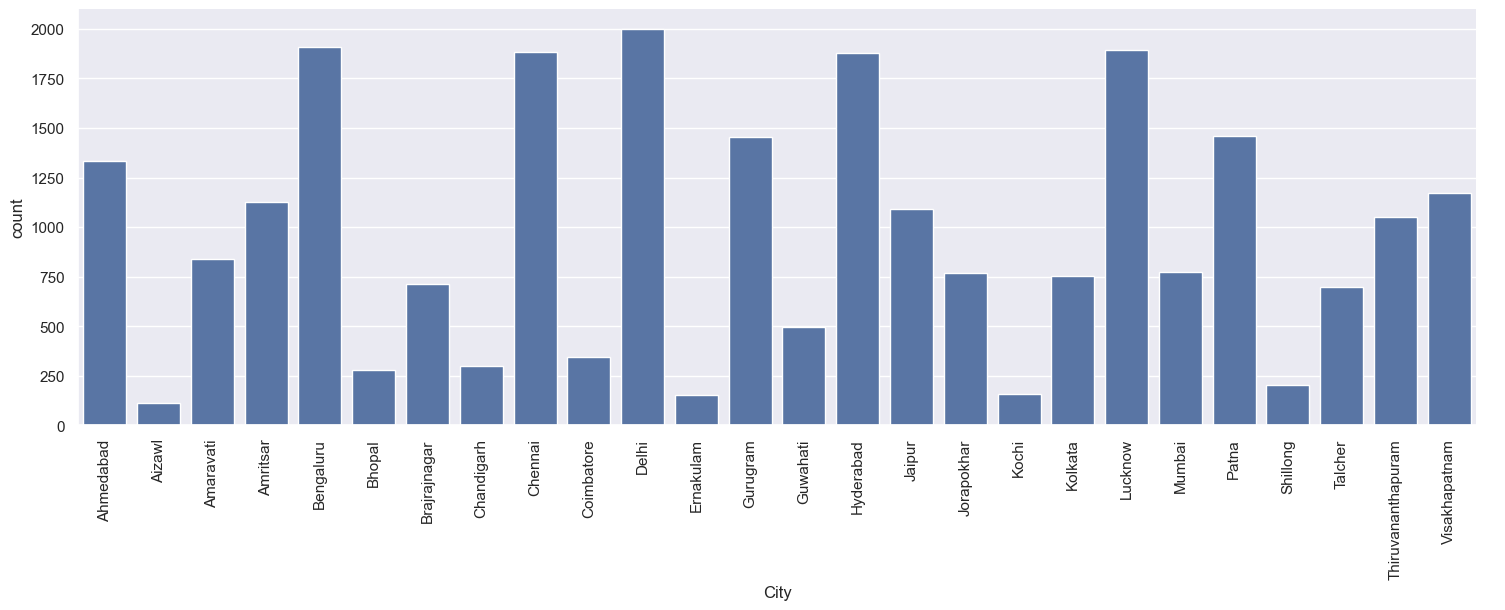

In [133]:
sns.set_theme(style="darkgrid")
graph = sns.catplot(x='City', kind= 'count', data=df, height = 5, aspect=3)
graph.set_xticklabels(rotation = 90)

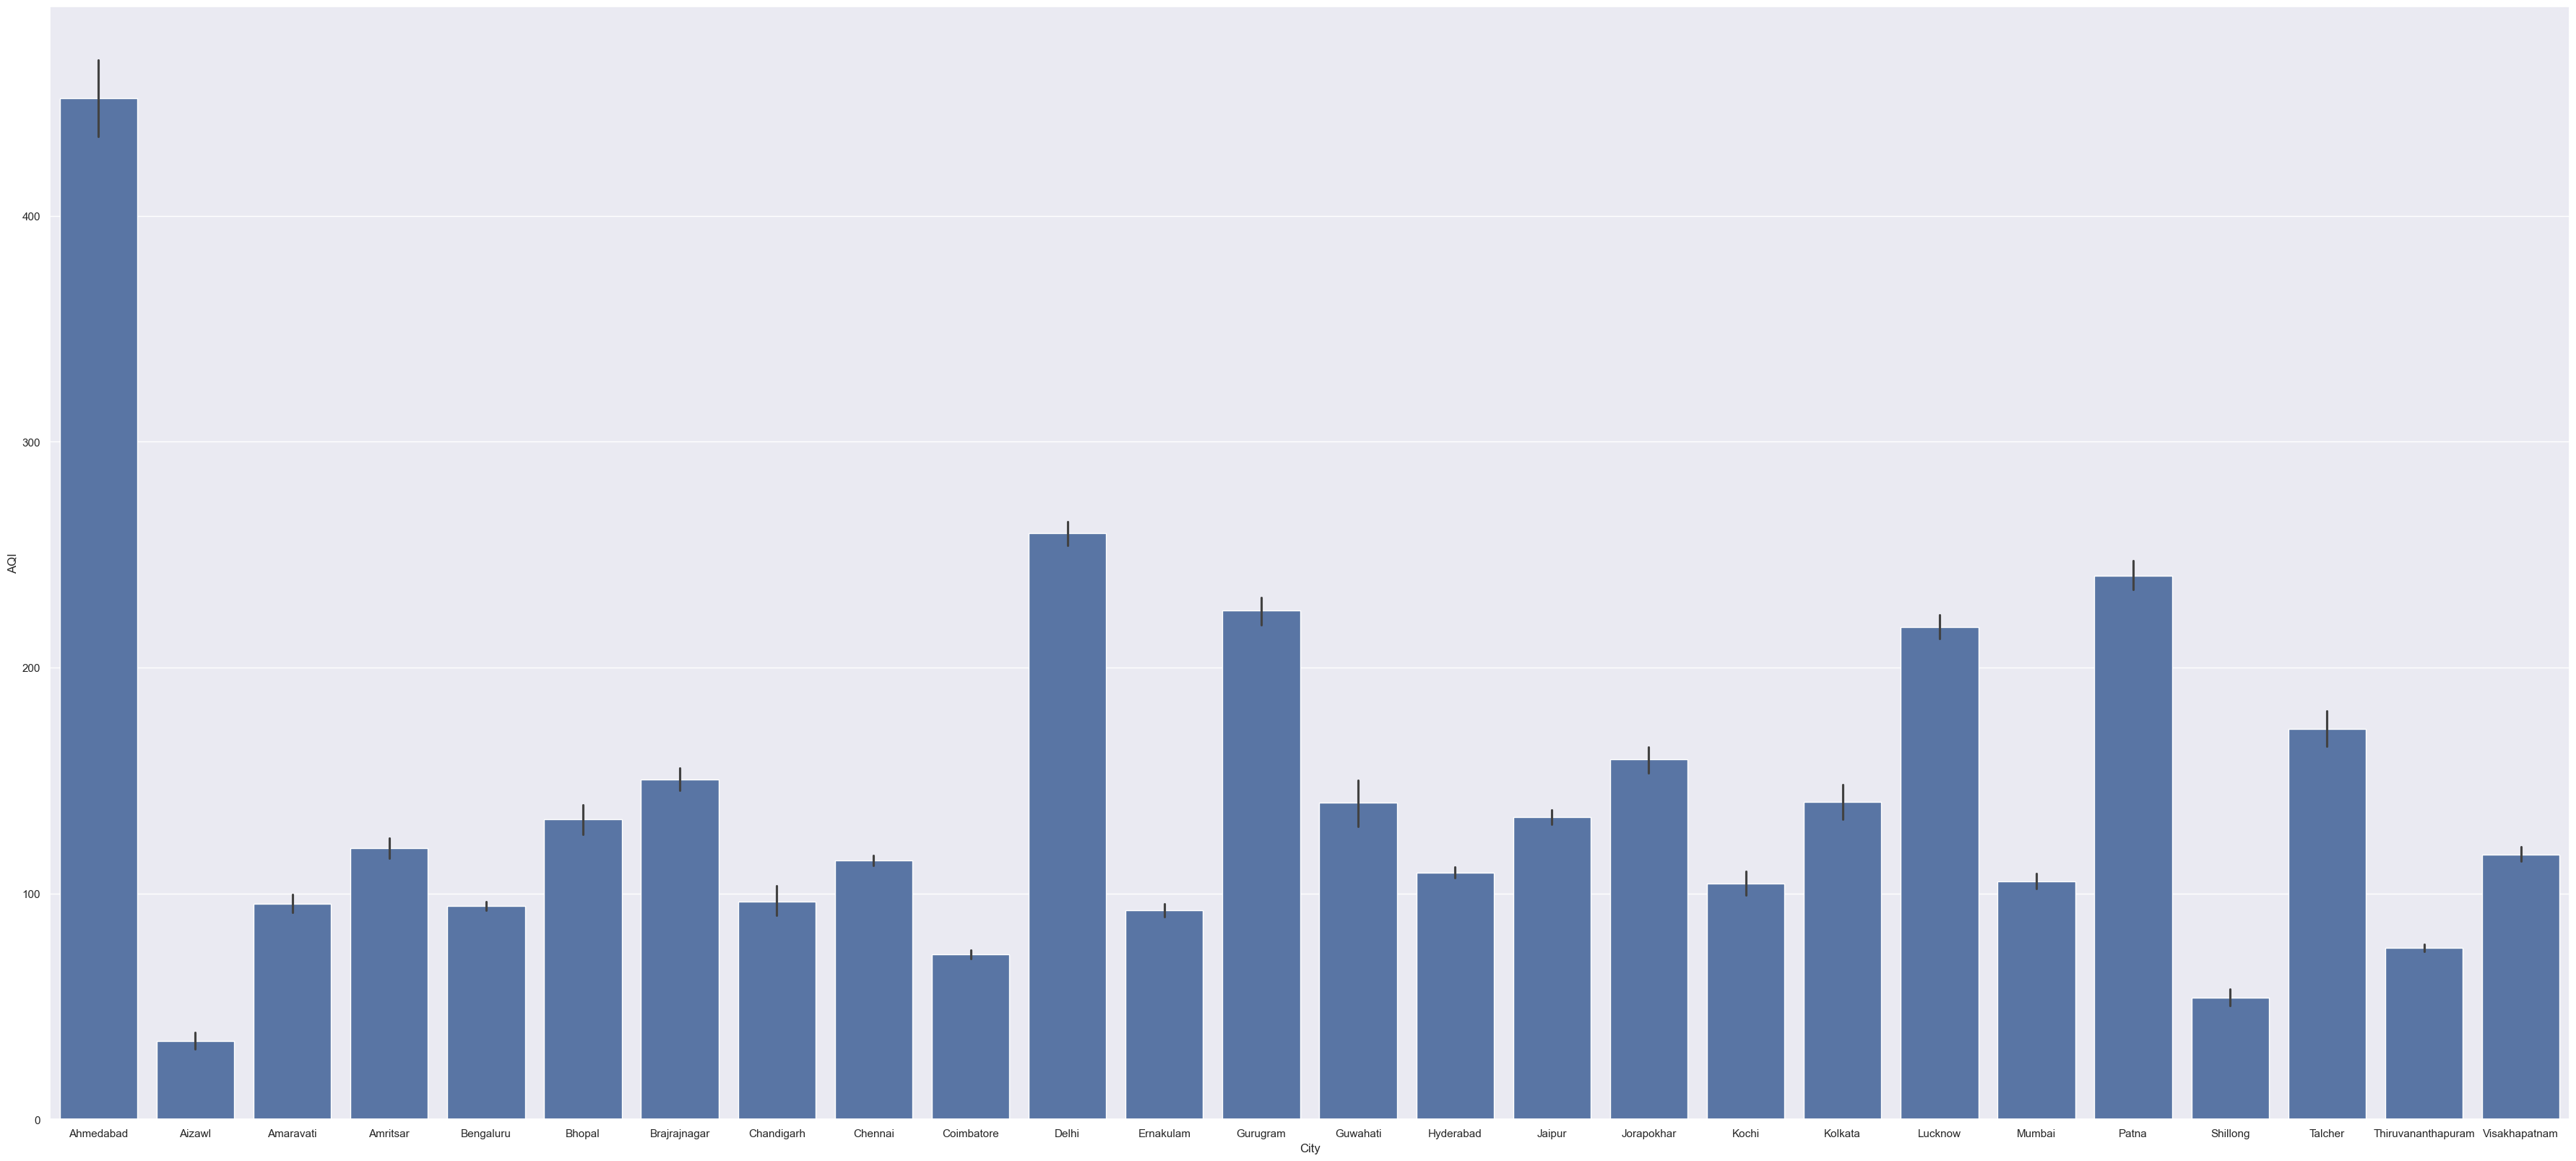

In [134]:
plt.figure(figsize=(45,20))
sns.barplot(x = "City",y = "AQI",data = df)
plt.show()

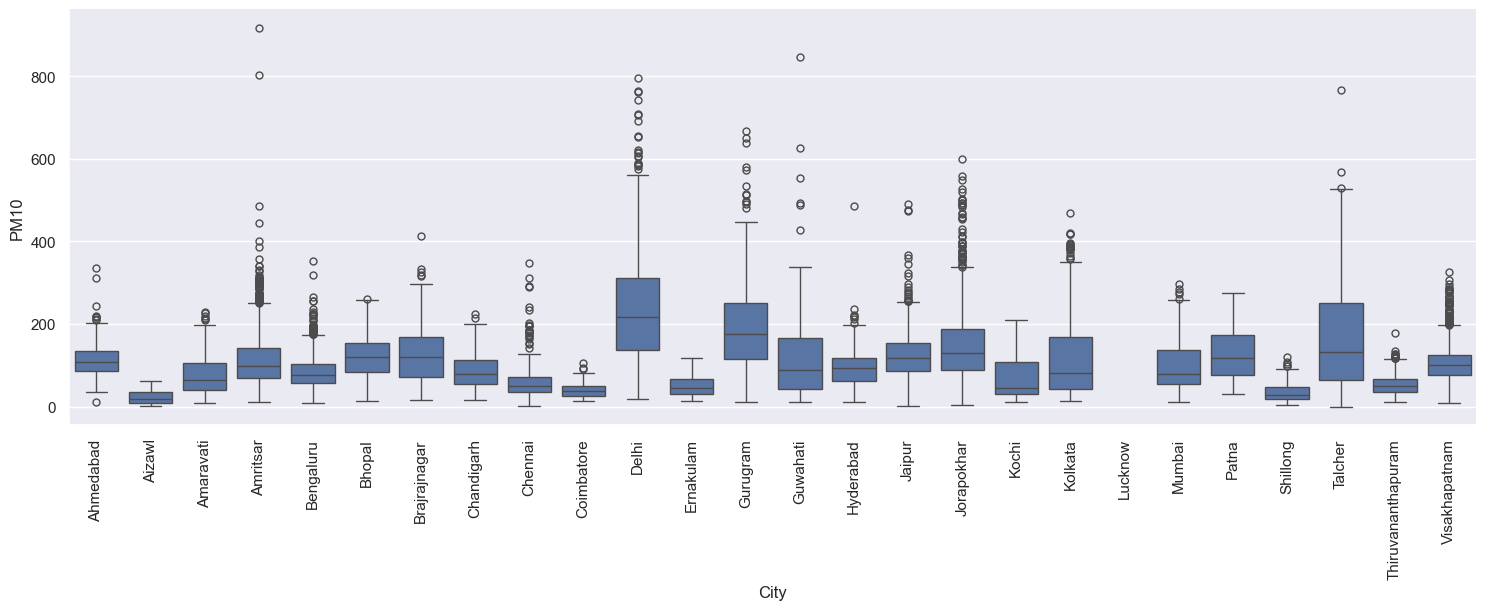

In [135]:
g = sns.catplot(x='City',y = "PM10", kind='box', data = df, height = 5, aspect = 3)
g.set_xticklabels(rotation = 90)


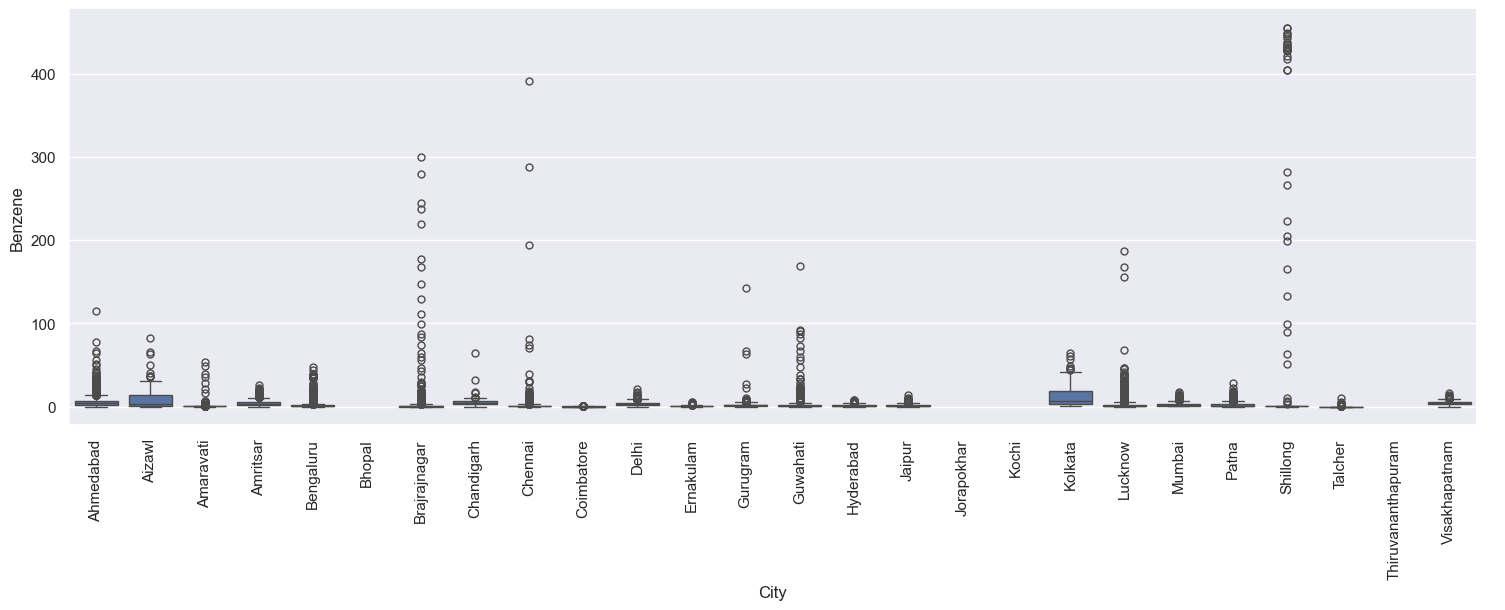

In [136]:
g1 = sns.catplot(x='City',y = "Benzene", kind='box', data = df, height = 5, aspect = 3)
g1.set_xticklabels(rotation = 90)

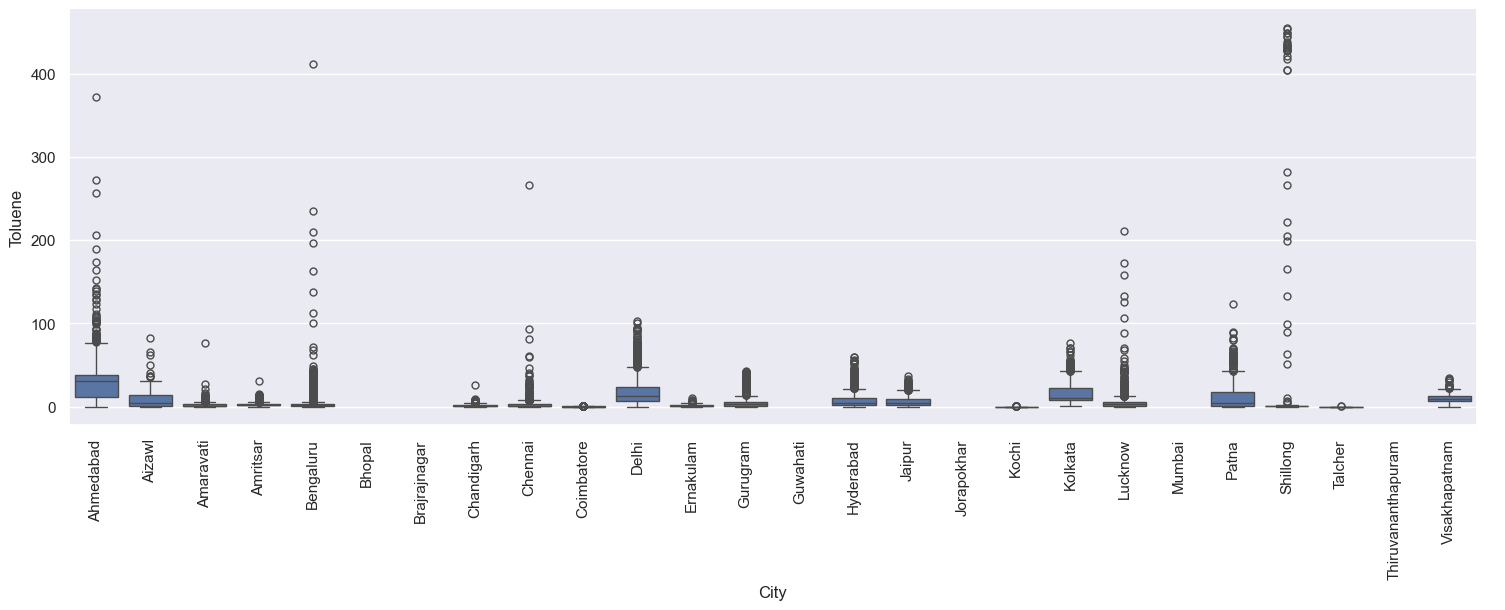

In [137]:
g2 = sns.catplot(x='City',y = "Toluene", kind='box', data = df, height = 5, aspect = 3)
g2.set_xticklabels(rotation = 90)

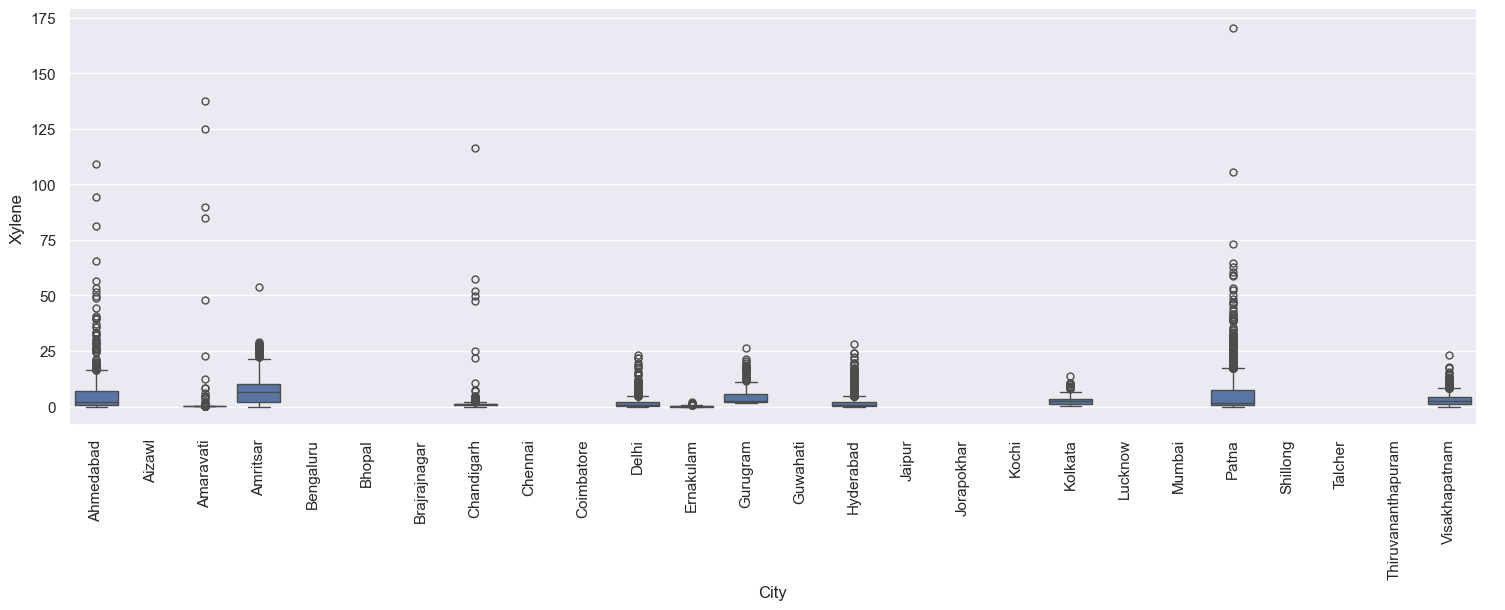

In [138]:
g3 = sns.catplot(x='City',y = "Xylene", kind='box', data = df, height = 5, aspect = 3)
g3.set_xticklabels(rotation = 90)

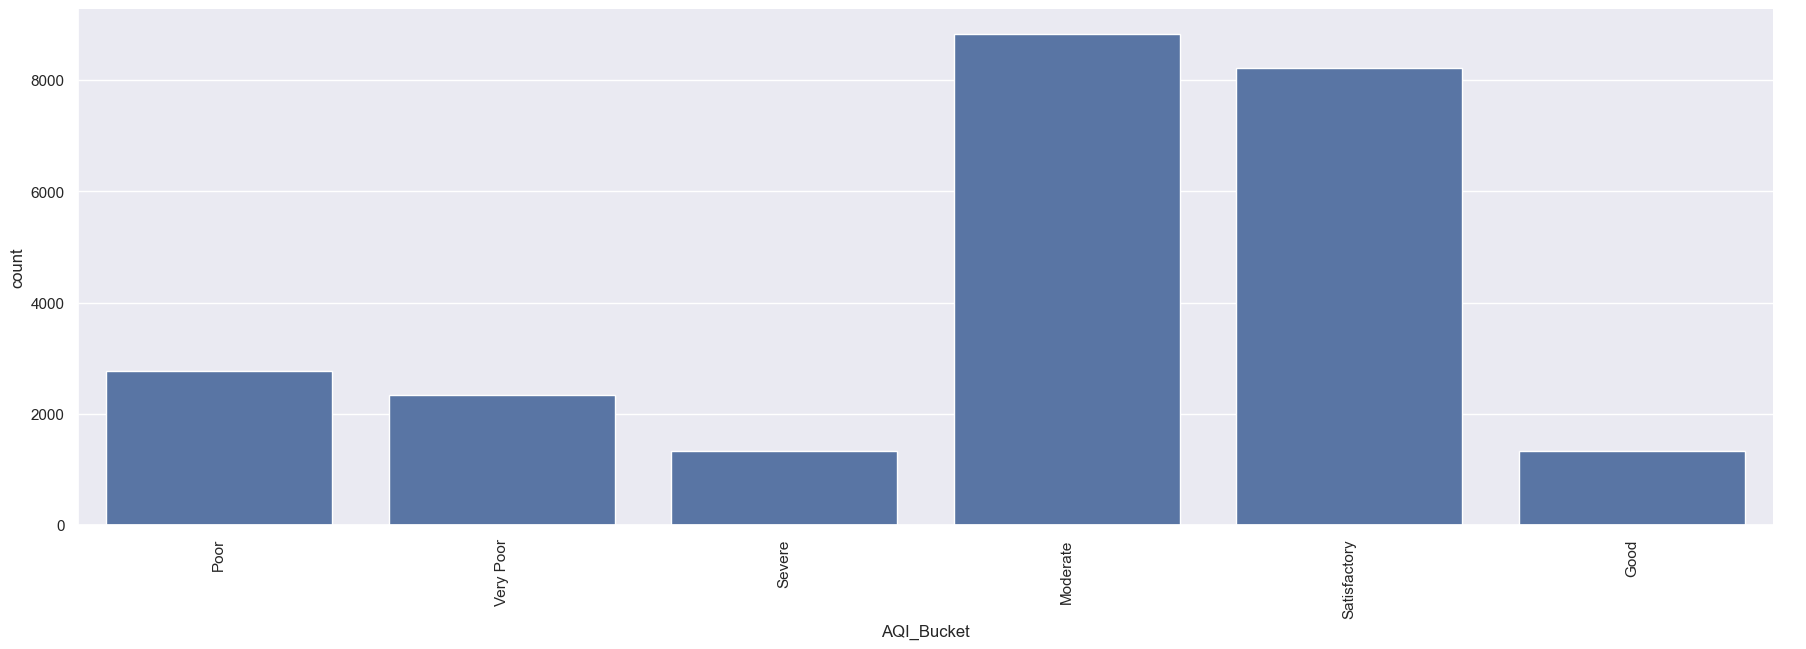

In [139]:
g = sns.catplot(x='AQI_Bucket', kind='count', data = df, height = 6, aspect = 3)
g.set_xticklabels(rotation = 90)

In [140]:
# to check null values
df.isnull().sum().sort_values(ascending = False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [141]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [142]:
df = df.replace({
    "PM2.5" : {np.nan:67.476613},
    "PM10" : {np.nan:118.454435},
    "NO" : {np.nan:17.622421},
    "NO2" : {np.nan:28.978391},
    "NOx" : {np.nan:32.289012},
    "NH3" : {np.nan:23.848366},
    "CO" : {np.nan:2.345267},
    "SO2" : {np.nan: 14.362933},
    "O3" : {np.nan:34.912885},
    "Benzene" : {np.nan:3.458668},
    "Toluene" : {np.nan:9.525714},
    "Xylene" : {np.nan:3.588683}
})



In [143]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [144]:
df.shape

(24850, 16)

In [145]:
df = df.drop(columns = "AQI_Bucket",axis = 1)

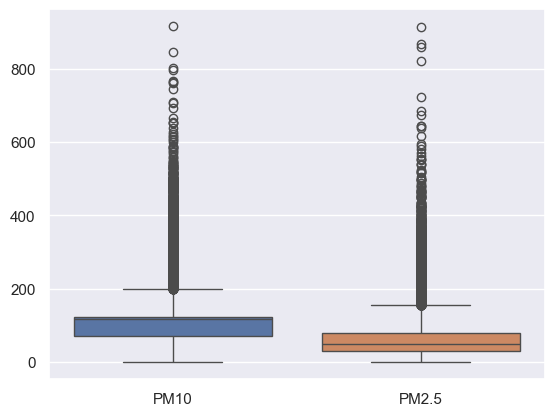

In [146]:
sns.boxplot(data = df[['PM10','PM2.5']])
plt.show()

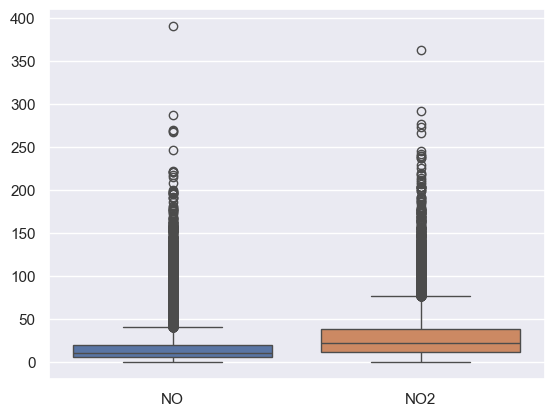

In [147]:
sns.boxplot(data = df[['NO','NO2']])
plt.show()

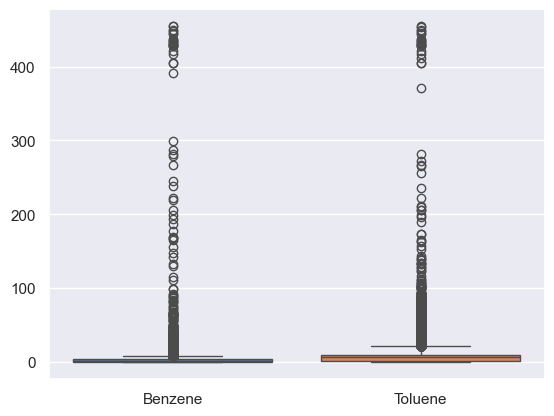

In [149]:
sns.boxplot(data = df[['Benzene','Toluene']])
plt.show()

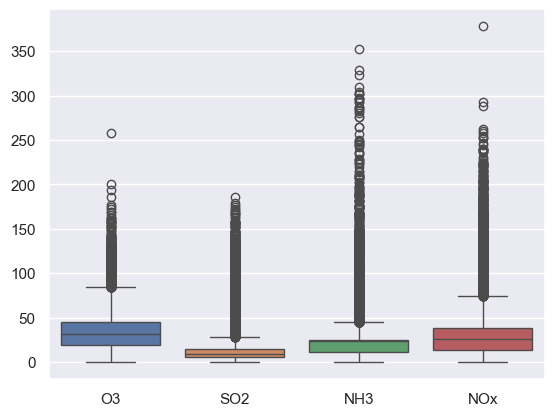

In [151]:
sns.boxplot(data = df[['O3','SO2','NH3','NOx']])
plt.show()

In [153]:
def replace_ouliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df[column] = df[column].apply(
            lambda x : Q1 if x < lower else (Q3 if x > upper else x)
        )
    return df

In [154]:
df = replace_ouliers(df)

In [155]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,55.174281,101.351323,12.507694,25.901114,26.574513,19.486584,1.040507,10.334743,33.177781,2.098520,6.222709,3.304507,146.932032
std,31.829575,39.079916,8.762015,16.669494,16.138682,9.630370,0.615436,5.680901,17.487724,1.828135,4.696068,0.558607,87.421731
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,1.250000,13.000000
25%,29.560000,71.780000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.640000,0.340000,1.580000,2.650000,81.000000
50%,50.165000,118.454435,10.075000,22.535000,25.720000,23.848366,0.950000,9.430000,32.060000,1.810000,6.790000,3.588683,118.000000
75%,79.505625,122.955625,19.710000,37.910000,38.170000,24.710000,1.530000,14.890000,45.395625,3.458668,9.525714,3.588683,208.000000
max,154.300000,199.700000,40.680000,76.620000,74.380000,44.850000,2.940000,28.520000,83.990000,8.130000,21.440000,4.990000,398.000000


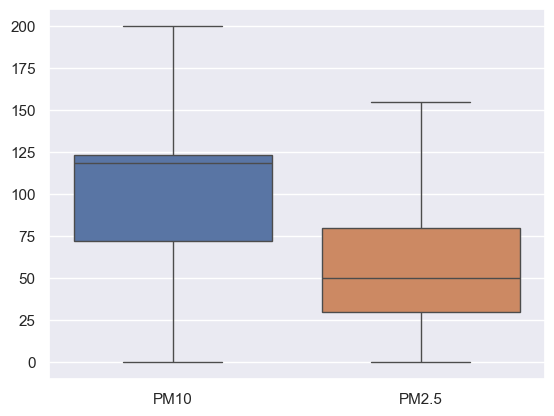

In [156]:
sns.boxplot(data = df[['PM10','PM2.5']])
plt.show()

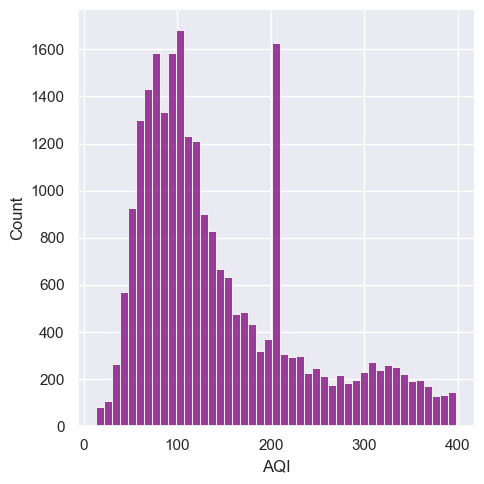

In [159]:
sns.displot(data = df,x = 'AQI',color='purple')
plt.show()

In [166]:
df1 = df.drop(columns = ['City'])


In [ ]:
df1 = df1.drop(columns = ['Date'])


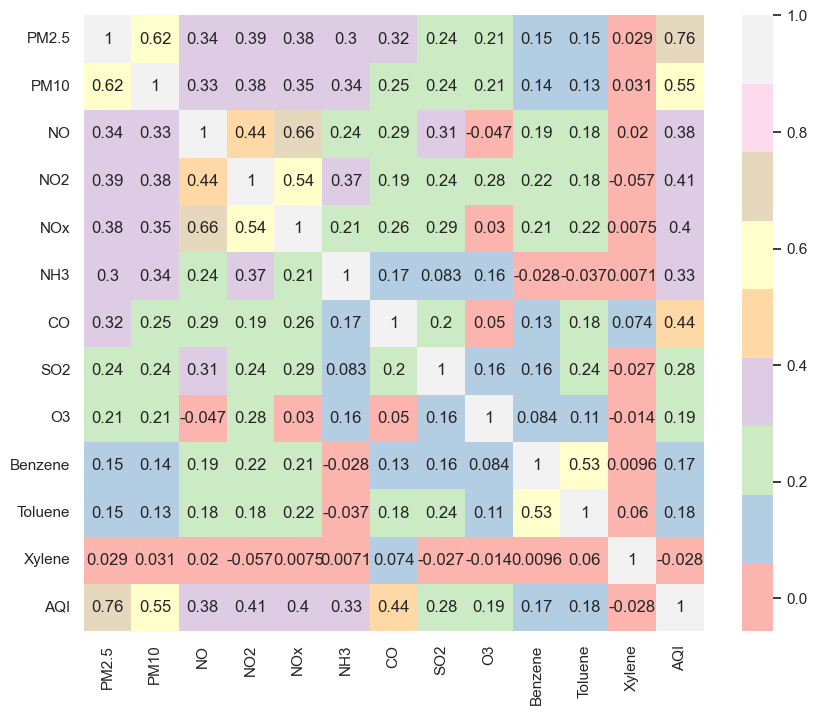

In [169]:
# Multi variate analysis
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot = True, cmap="Pastel1")
plt.show()